# Scenario

In this project we will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization project contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import folium
import requests
import io
%matplotlib inline

In [2]:
# importing Data


URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)
text = io.BytesIO(response.content)
df = pd.read_csv(text)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
# describing statistics of the data

df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
# check columns

df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

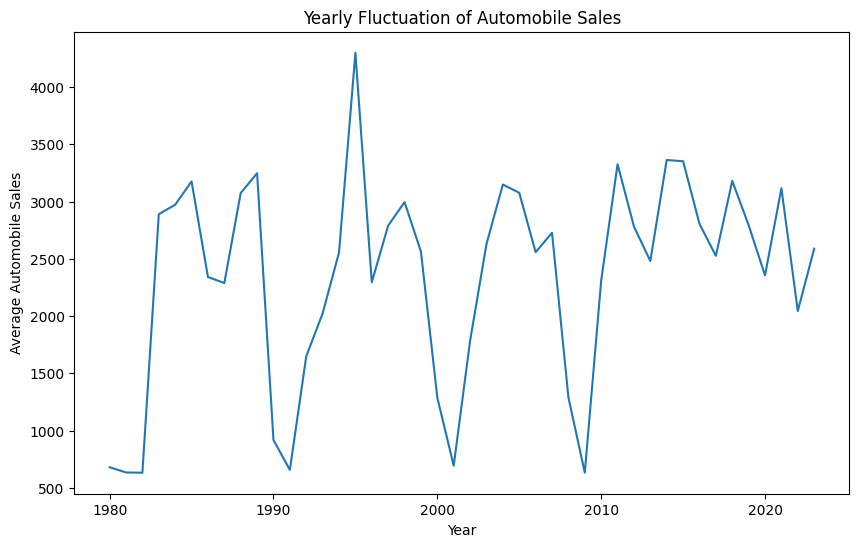

In [10]:
# Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

#create data for plotting

df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#create figure

plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Yearly Fluctuation of Automobile Sales')
plt.show()

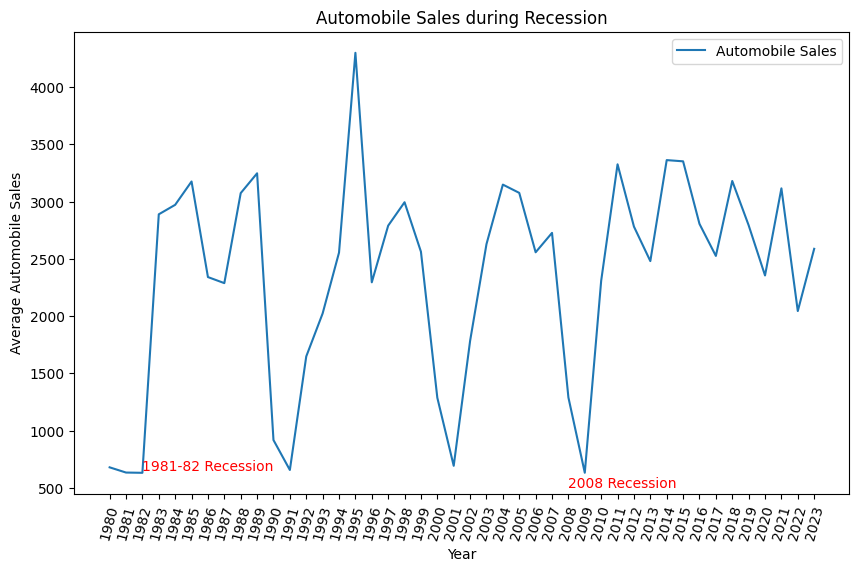

In [11]:
# ticks on x- axis with all the years, to identify the years of recession annotation for at least two years of recession
# Title as Automobile Sales during Recession

# Create data for plotting
df_line = df.groupby('Year')['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')

# Set ticks on x-axis with all years, adjusting rotation for readability
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')

# Annotate for years of recession
plt.text(1982, 650, '1981-82 Recession', color='red')
plt.text(2008, 500, '2008 Recession', color='red')

# Add legend
plt.legend(['Automobile Sales'])
plt.show()

Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods

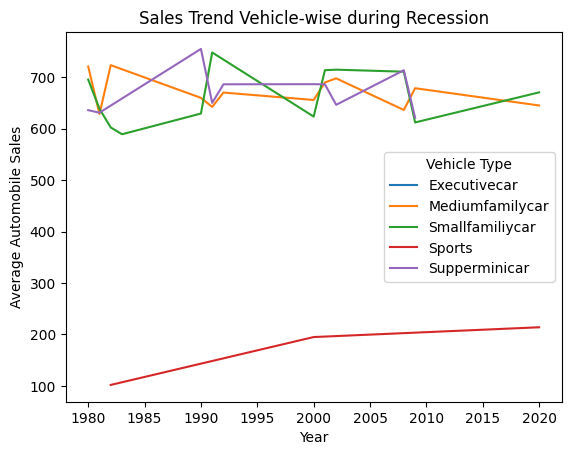

In [12]:
# Filter data for recession periods and calculate average sales per vehicle type per year
df_rec = df[df['Recession'] == 1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)

# Plot different lines for each vehicle type
for vehicle_type, data in df_Mline.groupby('Vehicle_Type'):
    data['Automobile_Sales'].plot(label=vehicle_type)

plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.show()

### From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle, while sales of the superminicar and smallfamilycar increased.

# Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

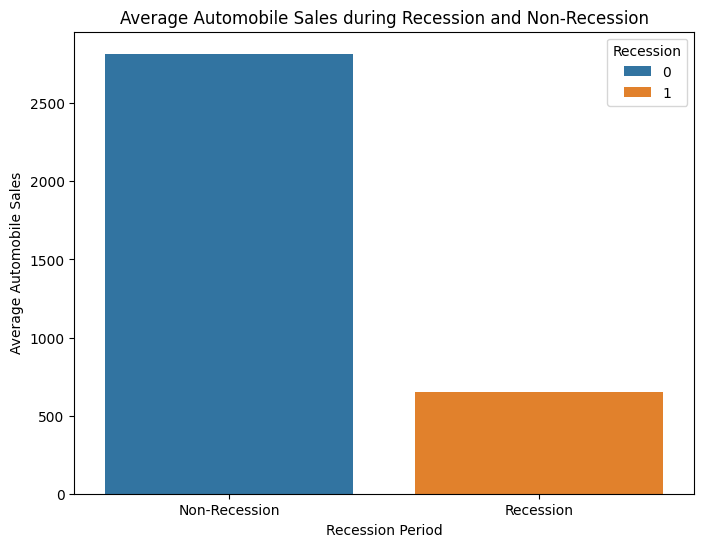

In [13]:
# Group by recession to calculate the average sales
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


Now we want to compare the sales of different vehicle types during a recession and a non-recession period.


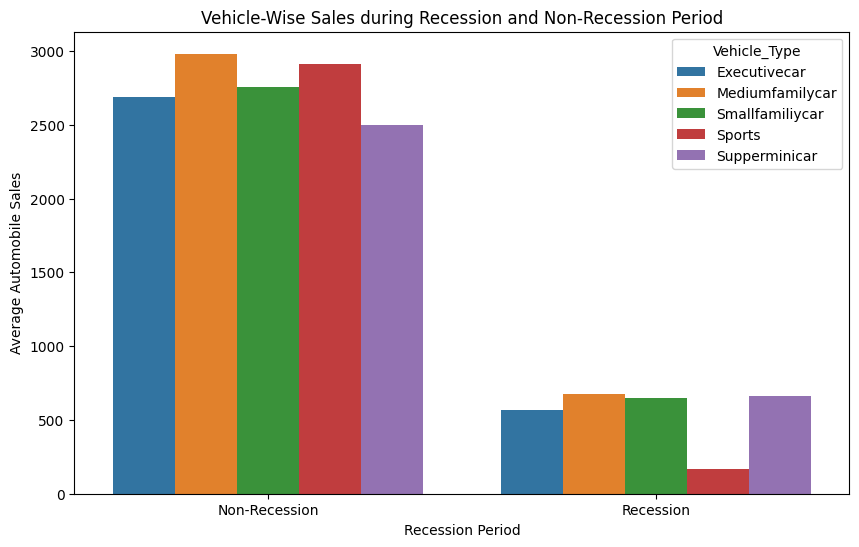

In [14]:
# Group by recession and vehicle type to calculate the average sales
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession. However, the most affected type of vehicle is executivecar and sports

# Using sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

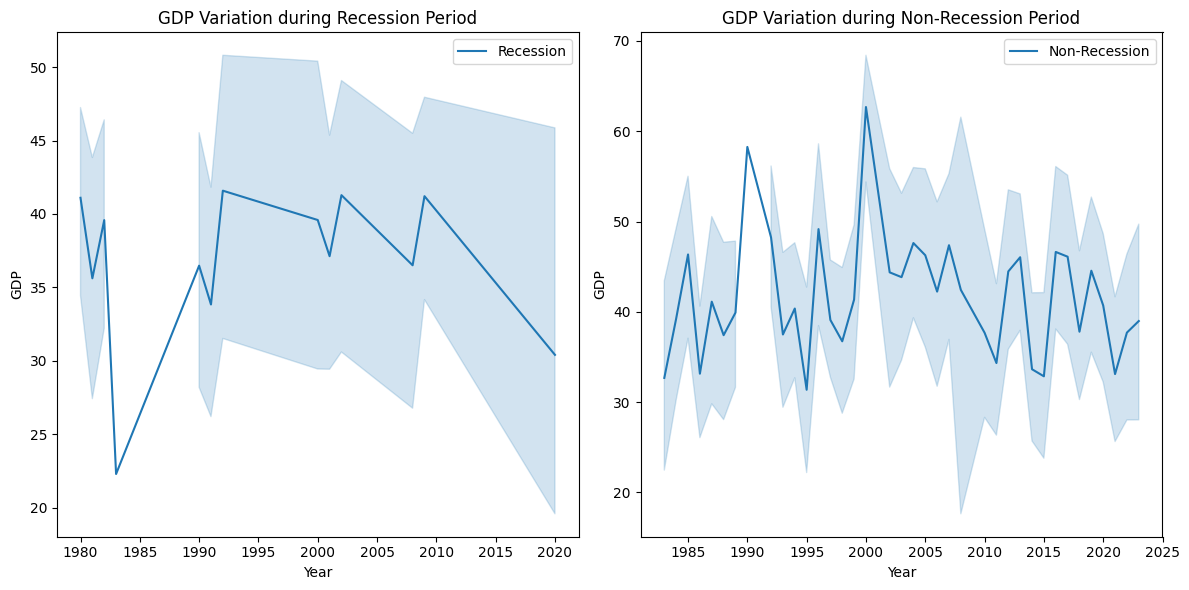

In [15]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create a figure with subplots for recession and non-recession periods
fig = plt.figure(figsize=(12, 6))

# Add subplot for recession period
ax0 = fig.add_subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Add subplot for non-recession period
ax1 = fig.add_subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

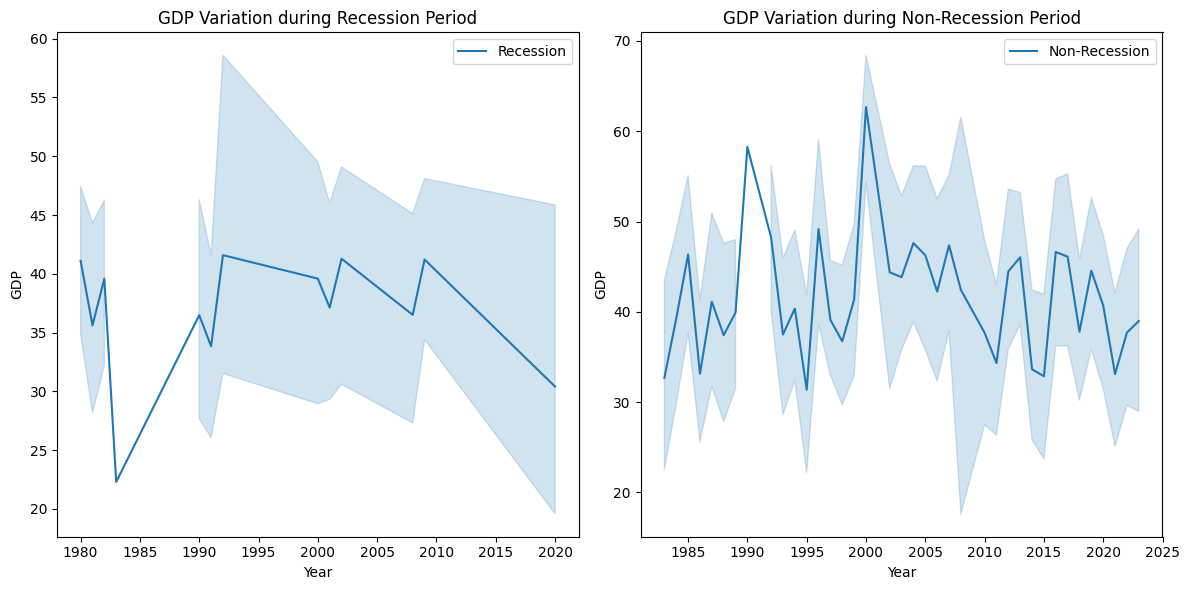

In [16]:
# Alternatively, using subplot() from matplotlib:

# Using plt.subplot() to create side-by-side plots for recession and non-recession GDP variations
plt.figure(figsize=(12, 6))

# Subplot for recession period
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# Subplot for non-recession period
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()

Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales

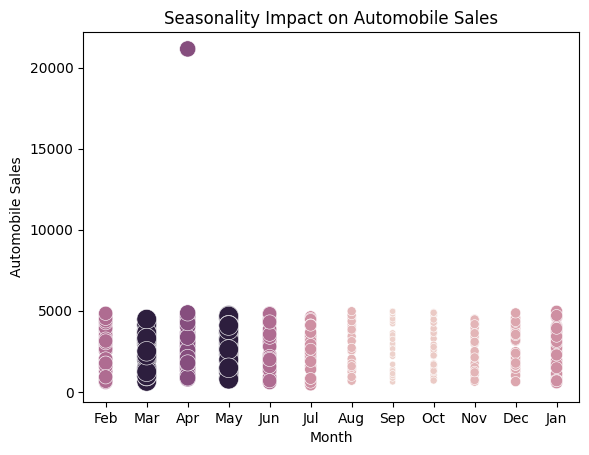

In [17]:
# Filter data for non-recession period
non_rec_data = df[df['Recession'] == 0]

# Define bubble sizes based on seasonality weight
size = non_rec_data['Seasonality_Weight']

# Create the bubble plot
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', sizes=(20, 200), legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.show()

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

## Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

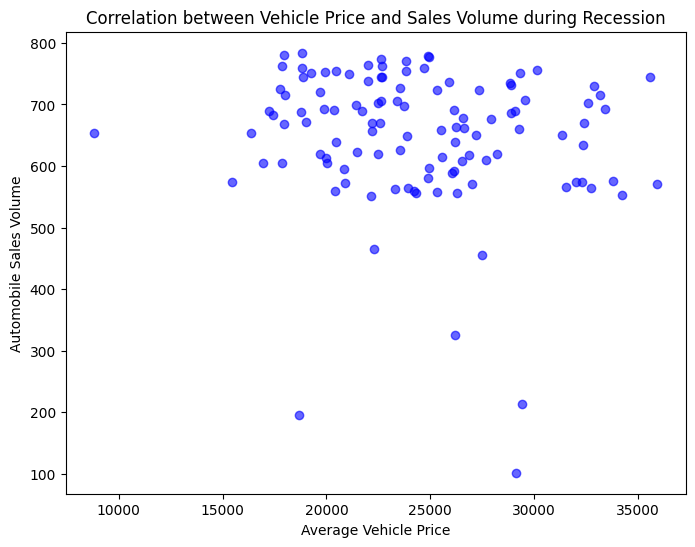

In [18]:
# Filter data for recession period
rec_data = df[df['Recession'] == 1]

# Scatter plot for average vehicle price vs. sales volume during recession
plt.figure(figsize=(8, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], color='b', alpha=0.6)

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales Volume')
plt.title('Correlation between Vehicle Price and Sales Volume during Recession')
plt.show()

### Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

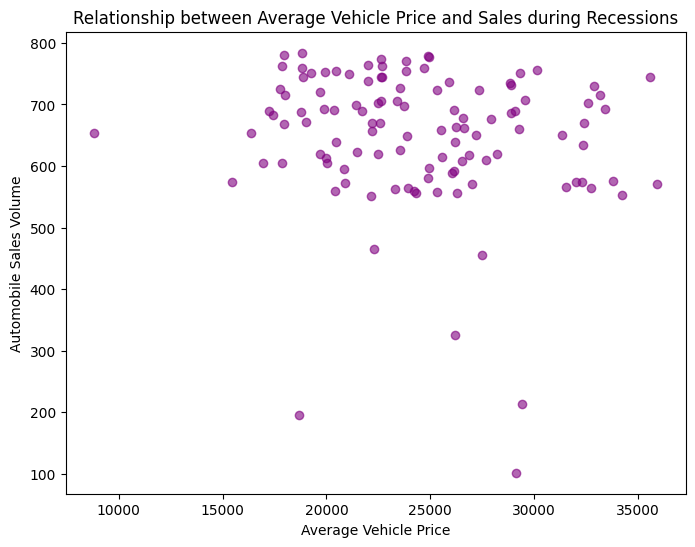

In [19]:
# Filter data for recession period
rec_data = df[df['Recession'] == 1]

# Scatter plot for average vehicle price vs. sales volume during recession
plt.figure(figsize=(8, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], color='purple', alpha=0.6)

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales Volume')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

There is not much relation!

Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

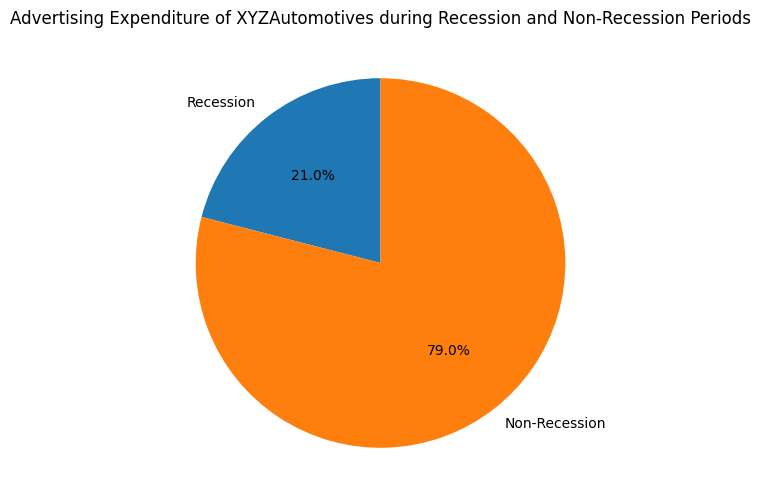

In [20]:
# Filter the data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure of XYZAutomotives during Recession and Non-Recession Periods')

plt.show()

It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

## Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

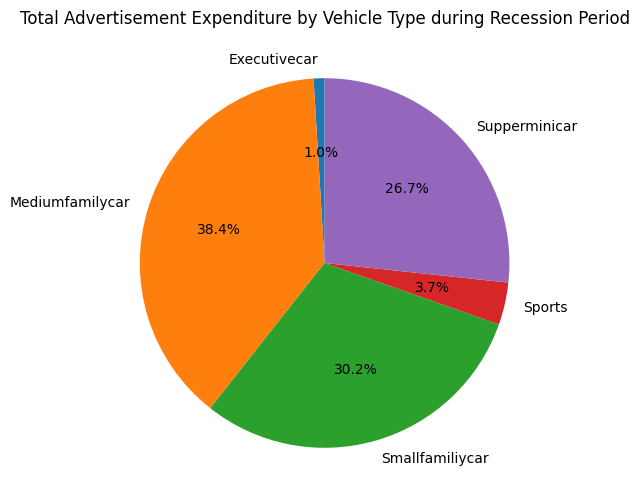

In [21]:
# Filter the data
Rdata = df[df['Recession'] == 1]

# Calculate the advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure by Vehicle Type during Recession Period')

plt.show()

During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

## Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

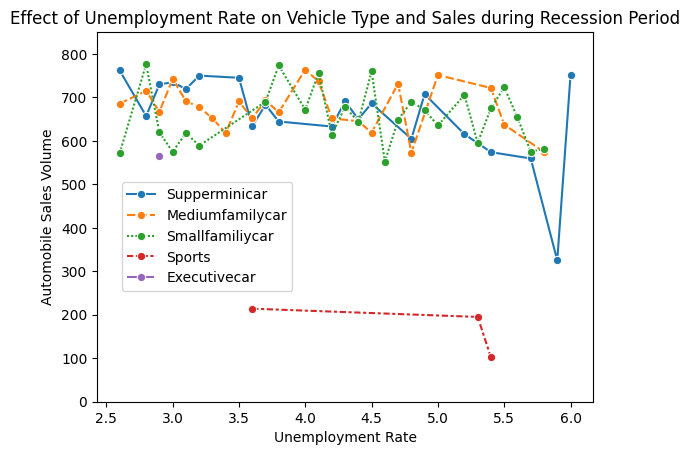

In [22]:
# Filter the data for the recession period
df_rec = df[df['Recession'] == 1]

# Create the line plot
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# Set the limits for the y-axis
plt.ylim(0, 850)

# Customize the legend location
plt.legend(loc=(0.05, .3))

# Set labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales Volume')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Period')

# Show the plot
plt.show()

During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

## Create a map on the hightest sales region/offices of the company during recession period

In [24]:


def download(url, filename):
    """Downloads a file from a URL and saves it to the specified filename.

    Args:
        url (str): The URL of the file to download.
        filename (str): The name of the file to save the downloaded data to.
    """
    response = requests.get(url, stream=True) # Use requests.get instead of pyfetch
    if response.status_code == 200:  # Check status_code instead of response.status
        with open(filename, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):  # Download and write in chunks
                f.write(chunk)

# Download the JSON file
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
download(path, "us-states.json")  # Call the download function to download the file

filename = "us-states.json"  # Set the filename variable

## We found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth

In [27]:
import json

# Load the GeoJSON file
with open('us-states.json', 'r') as f:
    geo_data = json.load(f)

# Print the properties of the first feature to understand the structure
print(geo_data['features'][0]['properties'])


{'name': 'Alabama'}


In [31]:
import pandas as pd
import folium
import json

# Load your data
# Assuming df is your DataFrame with sales data including 'City', 'Automobile_Sales', and 'Recession' columns

# Filter the data for the recession period
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a dictionary to map city names to sales amounts
sales_dict = dict(zip(sales_by_city['City'], sales_by_city['Automobile_Sales']))

# Load the GeoJSON file for US states
with open('us-states.json', 'r') as f:
    geo_data = json.load(f)

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data=geo_data,
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',  # Adjust if necessary
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Function to add sales data to tooltip
def get_tooltip(city):
    sales_amount = sales_dict.get(city, 0)  # Get sales amount or 0 if city not found
    return f'{city}: ${sales_amount:,}'  # Format with commas

# Add tooltips to the choropleth layer with sales amounts
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=['name'],
        aliases=['City'],
        localize=True,
        sticky=False,
        labels=False,
        style="""
        background-color: white;
        color: black;
        font-size: 12px;
        """
    ).add_to(choropleth.geojson),
)

# Add sales amounts to the tooltip
for feature in choropleth.geojson.data['features']:
    city_name = feature['properties']['name']
    sales_amount = sales_dict.get(city_name, 0)
    feature['properties']['Sales'] = f'${sales_amount:,.0f}'

# Finalize tooltips
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=['name', 'Sales'],
        aliases=['City:', 'Sales:'],
        localize=True
    )
)

# Display the map
map1.save('choropleth_map.html')
map1
